# Data loading

Завантажимо модулі, потрібні для першої частини проєкту. Для доступу до гугл диску для подальшого зчитування датасету з нього потрібно імпортувати модуль drive.

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Зчитуємо датасет з нашого гугл диску, використовуючи модуль pandas та структуру даних DataFrame, та виводимо його форму. Можна побачити, що усього в нас 15 колонок.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/adult.csv')
df.shape

(48842, 15)

Подивимось на пару рядків з датасету. У цьому проєкті ми будемо прогнозувати значення колонки "income".

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# EDA

Перейдемо до інтелектуального аналізу даних. По-перше, потрібно розглянути деякий опис наших колонок. Для початку виведемо базову інформацію по ним. Можна побачити, що у нас 6 колонок типу int та 9 типу object, або ж string. Крім того, у нас немає відсутніх значень. Але це не так і трохи пізніше ми покажемо чому.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Зараз поглянемо на деяку статистику числових даних, наприклад середнє значення, медіана, стандартне відхилення.

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Якщо ми виведемо відсоткове співвідношення кожного робочого класу у відповідній колонці, то побачимо, що майже 6 відсотків займає робочий клас "?". Але такого класу, очевидно, не існує. Можна зробити висновок, що відсутні значення у нашому датасеті відмічені знаком питання.

In [ ]:
df['workclass'].value_counts(normalize=True)

Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64

## Handling missing values

За допомогою методу replace() замінимо усі знаки запитання на NaN, який використовується для позначення відсутніх значень.

In [ ]:
df = df.replace('?', np.NaN)

Тепер коли ми викликаємо метод isna(), який повертає булевий Series, а потім сумуємо усі значення True, ми бачимо, що все-таки у нас є відсутні значення у 3 колонках.

In [ ]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Для демонстрації цього ми побудували такий графік, який також показує, що в 3 колонках у нас відсутні деякі значення.

<Axes: >

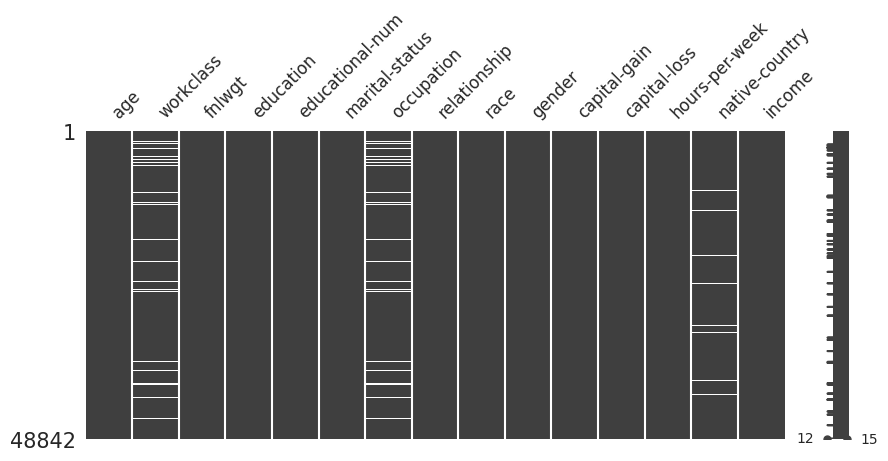

In [ ]:
msno.matrix(df, figsize=(10,4), fontsize=12)

Працювати з відсутніми значеннями ми будемо за цією схемою: якщо кількість відсутніх значень у колонці не перевищує 5 відсотків від усіх значень, то ми можемо видалити ці записи, а у іншому випадку - ми повинні замінити їх на якісь значення.
Наразі можна побачити, що видалити рядки можна по відсутнім значення з колонки "native-country".

In [ ]:
threshold = len(df) * 0.05
cols_to_drop = df.columns[(df.isna().sum() <= threshold) & (df.isna().sum() != 0)]
cols_to_drop

Index(['native-country'], dtype='object')

Видаляємо ці строки і бачимо, що в нас залишилися ще колонки "workclass" та "occupation".

In [ ]:
df.dropna(subset=cols_to_drop, inplace=True)

df.isna().sum()

age                   0
workclass          2753
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2763
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

У колонці "workclass" ми можемо замінити усі відсутні значення на моду - значення, яке зустрічається найчастіше у нашій виборці. Крім того, вище ми вже могли побачити, що майже у 70% записів робочий клас відповідає значенню "Private".

In [ ]:
df['workclass'].unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Для колонки "occupation", або ж сфера зайнятості, ми не можемо використовувати те саме правило. Якщо більшість записів відносяться до медичної сфери, то буде некоректно усіх відправити у ту саму сферу. Тому було вирішено замінити відсутні значення цієї колонки на "Other-service", що покриває велику кількість професій.

In [ ]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', nan,
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

Після заміни можна побачити, що все спрацювало і тепер у нас немає відсутніх значень.

In [ ]:
df['workclass'] = df['workclass'].fillna(df['workclass'].value_counts().index[0])
df['occupation'] = df['occupation'].fillna('Other-service')
df.isna().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

## Handling duplicated values

Ще одним важливим аспектом є значення-дублікати. Як можемо бачити, у нашому датафреймі є 52 рядка-дубліката.

In [ ]:
df.duplicated().sum()

52

Ми вирішили, що будемо вважати це помилками вводу, тому видалимо дублікати, залишаючи перший запис.

In [ ]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

# Data visualization

Тепер перейдемо до наступної частини нашого проєкту - візуалізації даних.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('pastel')

Використовуючи матрицю кореляції, виявимо залежності між числовими даними у DataFrame.

<ipython-input-74-38c2b9e7fb19>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.9, fmt='.2f')


<Axes: >

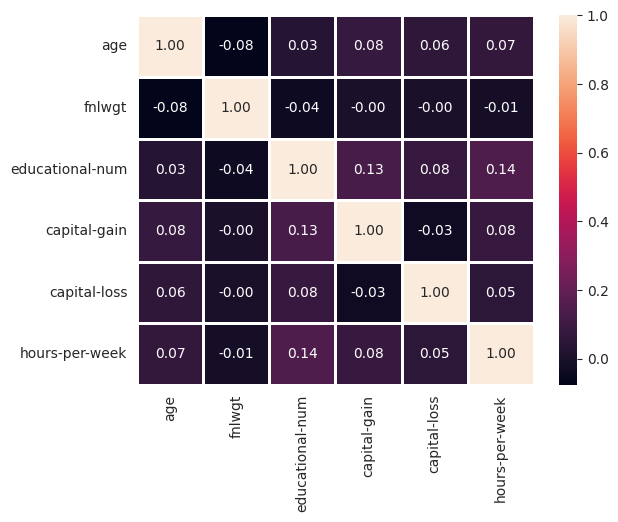

In [ ]:
sns.heatmap(df.corr(), annot=True, linewidths=.9, fmt='.2f')

Подивимося на розподіл значень стовпця 'income'. Як ми бачимо, наші дані є незбалансованими: людей, які отримують менше 50 тисяч доларів, більше, ніж тих, хто отримує більше.

<Axes: ylabel='income'>

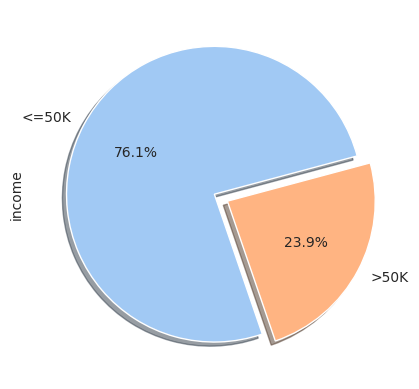

In [ ]:
df['income'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True, startangle=15)

У кожній групі людей із різним заробітком подивимося на розподіл робочих класів. Можна помітити, що у обох категоріях найбільше представників робітничого класу "Private".

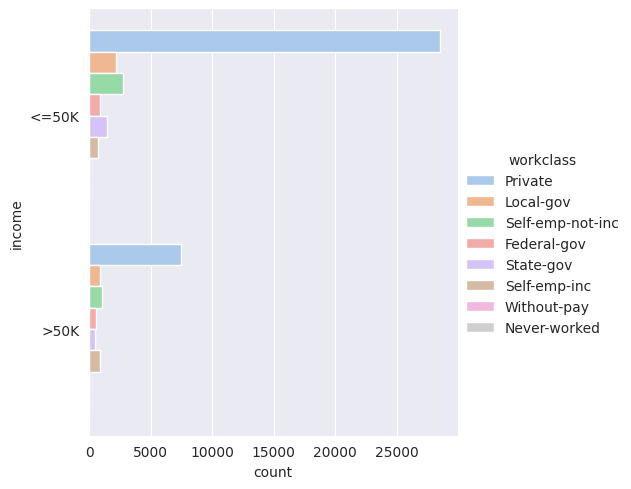

In [ ]:
sns.catplot(data=df, y='income', hue='workclass', kind='count')

Аналогічним чином розглянемо розподіл категорій зайнятості у різних групах залежно від заробітку. Можна побачити, що представники деяких професій дуже рідко отримують зарплату понад 50 тисяч доларів, наприклад Farming-fishing, Handlers-cleaners та Priv-house-serv, а найчастіше – Exec-managerial.

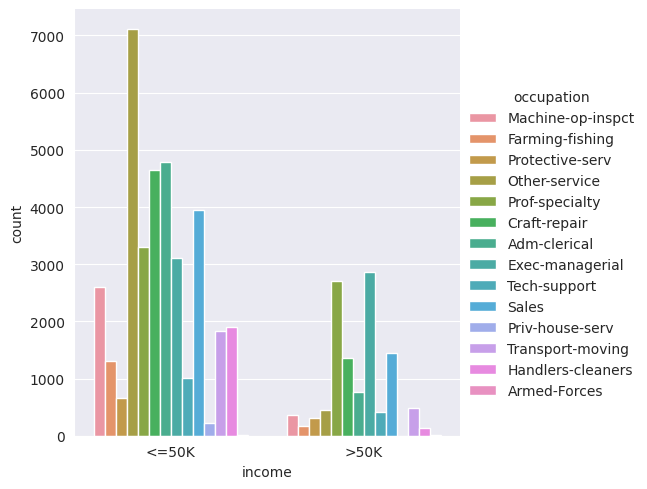

In [ ]:
sns.catplot(data=df, x='income', hue='occupation', kind='count')

Перевіримо гіпотезу: чи правда, що чим більше годин на тиждень працює людина, тим більше вона отримує. Для цього будемо використовувати violinplot. Графік відображає, що люди, які отримують більше 50 тисяч доларів, зазвичай не працюють менше 30 годин на тиждень. Як можна побачити, графік підтверджує цю гіпотезу: люди, які працюють більше години на тиждень, частіше отримують зарплату вищу.

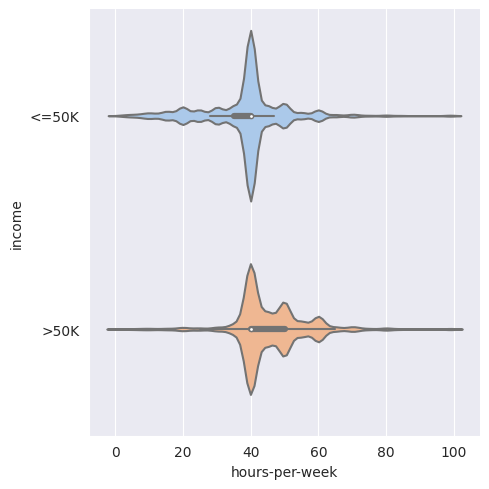

In [ ]:
sns.catplot(kind='violin', data=df, x='hours-per-week', y='income')

Висунемо наступну гіпотезу: чи правда, що в середньому ті, хто старший, отримують вищу зарплату. Для цього скористаємося boxplot. На графіку видно, що медіана для категорії людей, які заробляють менше ніж 50 тисяч доларів, становить 33 роки, а для тих, хто більше – 42 роки. На графіку існують викиди, обчислені програмою, але проаналізувавши їх, ми дійшли висновку, що люди старше 70 років можуть мати певний дохід.

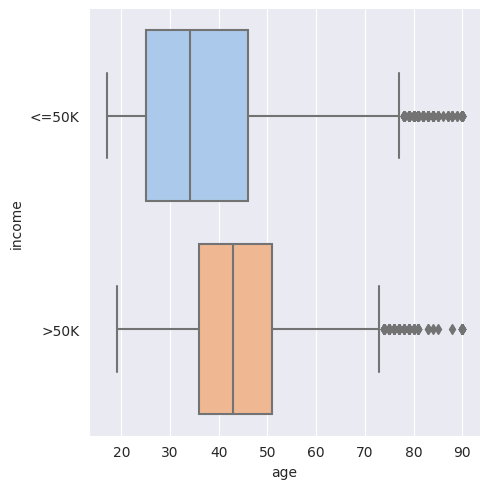

In [ ]:
sns.catplot(kind='box', data=df, x='age', y='income')

На наступному графіку ми можемо визначити в яких робочих класах було витрачено більше років на навчання і як це вплинуло на зарплату. Ми бачимо, що практично у всіх робочих класах люди, які навчалися довше, одержують більшу зарплату.

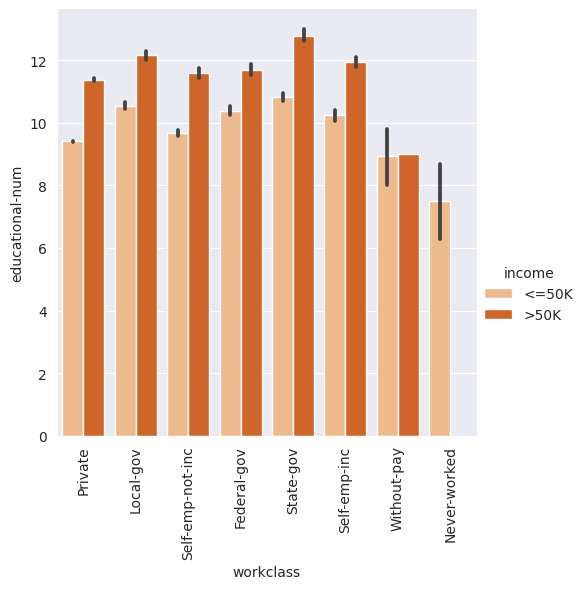

In [ ]:
count = sns.catplot(kind='bar', data=df, x='workclass', y='educational-num', hue='income', palette='Oranges')
count.set_xticklabels(rotation=90)

Так само, як і на попередньому графіку, подивимося, чи є якась залежність у різних професіях одержуваної зарплати від витраченого на навчання часу. І знову бачимо, що ті люди, які навчалися довше, одержують більшу зарплату. Істотну різницю можна побачити для професій Armed-forces та Priv-house-serv.

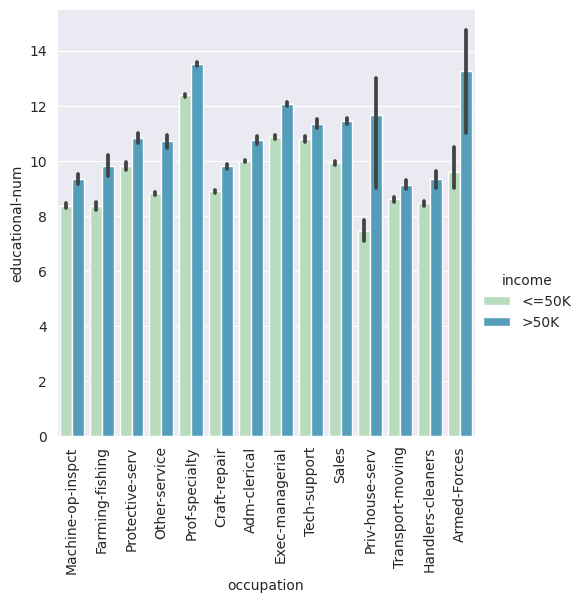

In [ ]:
count = sns.catplot(kind='bar', data=df, x='occupation', y='educational-num', hue='income', palette='GnBu')
count.set_xticklabels(rotation=90)

Перевіримо гіпотезу, чи правда, що чоловіки у різних робітничих класах заробляють більше, ніж жінки. На графіку чітко видно, що чоловіки частіше за жінок мають зарплату більше 50 тисяч доларів у різних робочих класах.

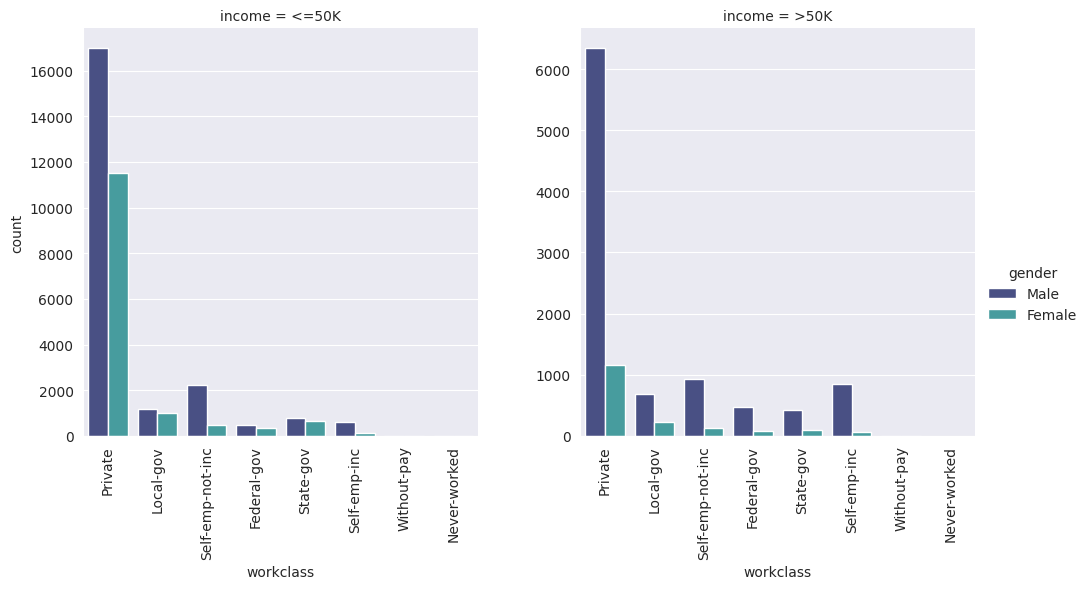

In [ ]:
count = sns.catplot(data=df, x='workclass', col='income', kind='count', hue='gender', sharey=False, palette='mako')
count.set_xticklabels(rotation=90)

На поданому нижче графіку розглянемо окремо для чоловіків та жінок рівень зарплат у різних професіях. Можемо бачити, що кількість людей, які отримують більше 50 тисяч доларів, більша в порівнянні з тими, хто отримує зарплату нижчою, тільки для чоловіків у спеціальностях Exec-managerial та Prof-speciality.

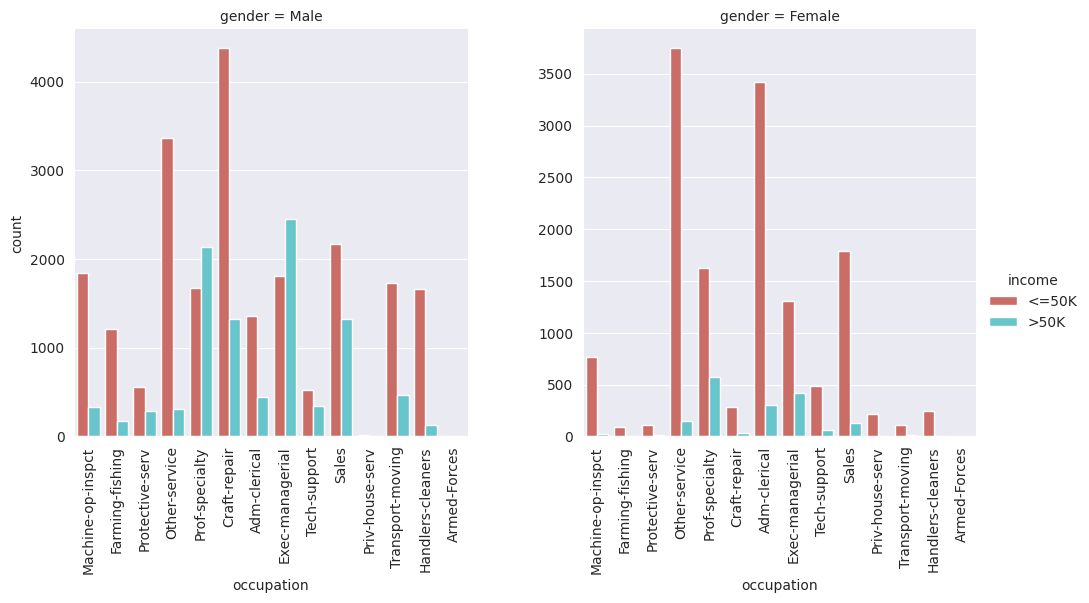

In [ ]:
count = sns.catplot(kind='count', data=df, x='occupation', hue='income', col='gender', sharey=False, palette='hls')
count.set_xticklabels(rotation=90)

Перевіримо гіпотезу, чи правда ті, хто перебувають у шлюбі, частіше отримують більш високу зарплату, ніж ті, хто ніколи не був у шлюбі. На даному графіку ми можемо побачити те, що більшість тих, хто отримує більше 50 тисяч доларів перебувають у шлюбі. Хоча одруження не гарантує отримання вищої зарплати. Крім того, серед тих, хто отримує менше 50 тисяч доларів, більшість ніколи не були одружені.

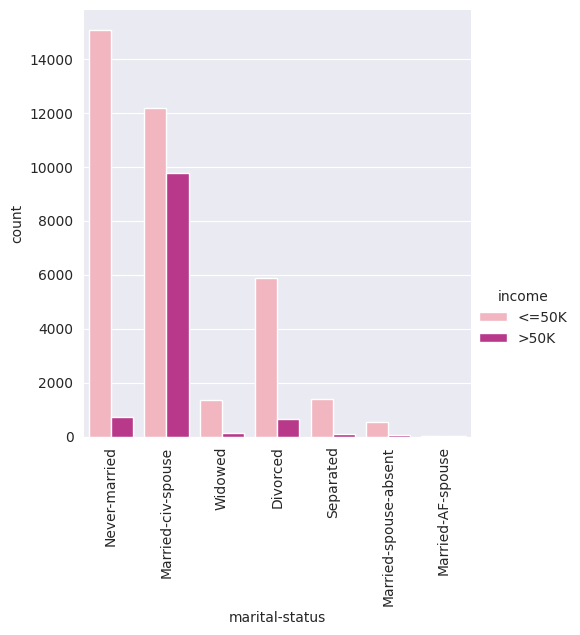

In [ ]:
count = sns.catplot(kind='count', data=df, x='marital-status', hue='income', palette='RdPu')
count.set_xticklabels(rotation=90)

# Machine learning

І наостанок розглянемо машинне навчання, а саме: попередню підготовку даних, підбір та налаштування моделі.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Machine learning preprocessing

Для машинного навчання бажано, щоб наші значення string були закодовані у вигляді чисел. Тому зараз ми автоматично закодуємо колонки з типом даних "object" числами за допомогою LabelEncoder().

In [ ]:
categorical_columns = [col for col in df.columns if df[col].dtype=='object']

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,7,3,4,0,0,0,30,38,0


Після кодування всі колонки стають цифровими, тому можемо за допомогою кореляції визначити, значення яких колонок майже не впливають на шукану змінну.

In [ ]:
df.corr()['income'][:].sort_values(ascending=False)

income             1.000000
educational-num    0.333409
age                0.229820
hours-per-week     0.228073
capital-gain       0.222492
gender             0.214680
capital-loss       0.146951
education          0.080788
race               0.071764
occupation         0.043659
native-country     0.020172
workclass         -0.000428
fnlwgt            -0.006682
marital-status    -0.198107
relationship      -0.253346
Name: income, dtype: float64

<Axes: >

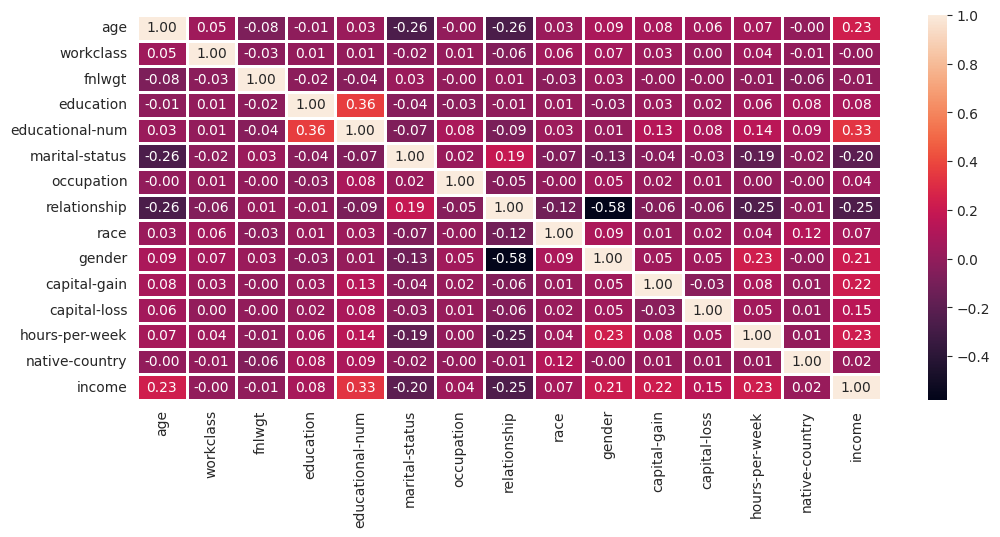

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt='.2f')

При виділення признаків ми вирішили не включати колонки "workclass" та "fnlwgt" у фінальний варінт даних для машинного навчання, бо у них найнижча кореляція з "income" серед усіх.
Також нам потрібно розділити наші дані на дві групи: тренувальну, на якій модель буде навчатися, та тестову, на якій модель буде тестувати свою точність. розділяємо за правилом "70 на 30".

In [ ]:
X = df.drop(['income', 'workclass', 'fnlwgt'], axis=1).values
y = df['income'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=121)

Крім того, усі наші значення у різному масштабі, тому потрібно їх маштабувати. Для цього використовуємо StandardScaler().

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Evaluating classification models

Переходимо до тестування різних моделей, а саме: логістична регресія, к найближчих сусідів, дерево рішень та рандомний ліс. Для більш точного тесту було вирішено використовувати перехресну перевірку. На графіку можна побачити середнє значення точності моделі та її приблизний розподіл.

{'whiskers': [<matplotlib.lines.Line2D at 0x7eaba6c6fd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7eaba6c84310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eaba6c6faf0>,
 'medians': [<matplotlib.lines.Line2D at 0x7eaba6c84850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7eaba6c84af0>,
 'means': []}

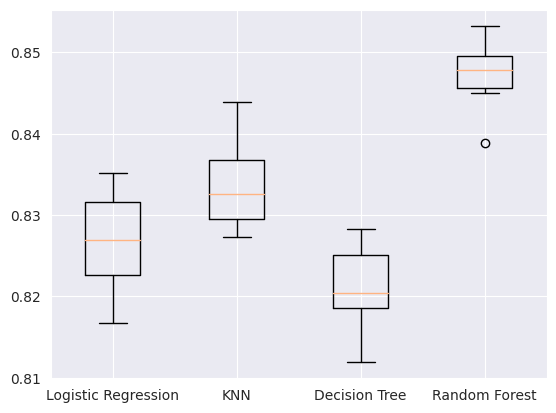

In [ ]:
models = {"Logistic Regression": LogisticRegression(solver='liblinear', max_iter=2000), "KNN": KNeighborsClassifier(), "Decision Tree": DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier()}
results = []
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())

Також було вирішено протестувати кожну модель на повному тренувальному наборі. Як ми можемо побачити, найкраще за всіх себе показала модель RandomForest, тому її ми і будемо використовувати.

In [ ]:
accuracy = []
predictions = {}
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  test_score = model.score(X_test_scaled, y_test)
  print(f'{name} Test Set Accuracy: {test_score}')
  predictions[name] = model.predict(X_test_scaled)

Logistic Regression Test Set Accuracy: 0.8198191933240612
KNN Test Set Accuracy: 0.8239916550764951
Decision Tree Test Set Accuracy: 0.8168984700973574
Random Forest Test Set Accuracy: 0.841307371349096


На матриці неточностей можна побачити, що модель непогано справляється з поставленою задачею, але ми спробуємо її покращити.

<Axes: >

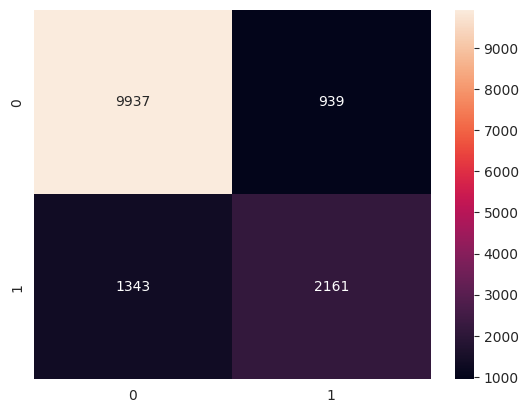

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, predictions['Random Forest']), annot=True, fmt = '.0f')

## Hyperparameter tuning

І от залишилося нам тільки налаштувати нашу модель. Будемо підбирати оптимальні параметри: n_estimators (кількість дерев у лісі), min_samples_split (мінімальна кількість зразків, необхідних для розбиття внутрішнього вузла), min_sample_leaf (мінімальна кількість зразків, яка повинна знаходитися у вузлі листка).

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Для налаштування буде використовуватися пошук по сітці. Можемо одразу побачити найкращі параметри.

In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Точність нашої моделі покращилася.

In [ ]:
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_scaled)
print(f'Random Forest Test Set Accuracy: {accuracy_score(y_test, y_pred)}\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Random Forest Test Set Accuracy: 0.8570931849791377

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10876
           1       0.76      0.60      0.67      3504

    accuracy                           0.86     14380
   macro avg       0.82      0.77      0.79     14380
weighted avg       0.85      0.86      0.85     14380



І також можна побачити, що тепер вона ще краще класифікує наші дані.

<Axes: >

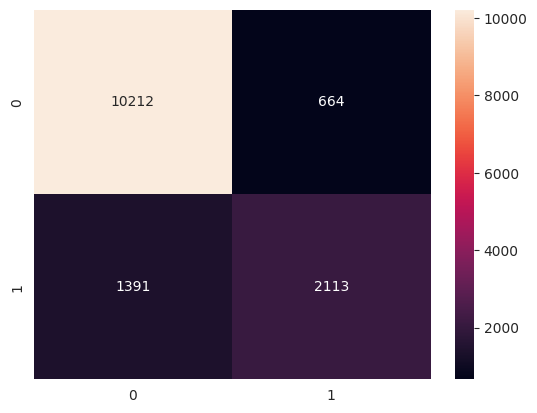

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt = '.0f')